Marcus Frischherz, Matrikelnummer 08225094
# 280412-1 Introduction to Statistics and Data for Astrophycisits
## Exercise 3

### Hypothesis Testing (1)
#### a)

Null Hypothesis $H_o$: $\mu = -7.7\,mag$

Alternative Hypothesis $H_a$ : $\mu \ne -7.7\,mag$

This implies a two-tailed test. We do not know the $\sigma$, and want to investigate the mean. This implies, we use the 
Student's t-Test with the test statistic $T = \frac{\bar{X} - \mu}{S/\sqrt{n}} $.

#### b)
For large sample sizes (> 30), the t-distribution approaches the normal distribution with $\sigma = S$. For the normal distribution (Z-distribution) the normalized form is $T = Z = \frac{\bar{X} - \mu_o}{\sigma \sqrt{n}} $ . Under $H_o$ this becomes
$\frac{\bar{X} + 7.7}{\sigma \sqrt{n}} $ because $\mu = -7.7\,mag$ , see above.

#### c)
We can reject $H_o$ when $T_o$ > critical value $T_c$. For a confidence value 5% = 0.05, and a two-tailed test, we have to
set up symetric rejection areas at $z < \alpha / 2$ = 0.025, and $z > (1 - \alpha / 2 = 0.975)$. Using the z-score table from the lecture 5, checking with z = 0.975 we get the z-score 1.96. So for $|T_o| > 1.96 $ the test statistic will be in the rejection area.

#### d)
$T_o = \frac{-7.5 + 7.7}{\sqrt{1.1} / \sqrt{148}} = 2.320 $. In the table we find for z=2.320 the value 0.9898

As this test is two-tailed, we have to check for $z < \alpha / 2$ = 0.025, and $z > (1 - \alpha / 2 = 0.975)$. The z-score is larger. This means, we can reject $H_o$.

### Hypothesis Testing (2)
#### a)
Confidence interval definition:
$P(\bar{x} - E ) \leq \mu \leq \bar{x} + E) = 1 - \alpha$

$T = \frac{\bar{x} - \mu}{S/\sqrt{n}} \approx t_{n-1}$ for n-1 degrees of freedom

We use again the approximation of a standard normal distribution.

$P(-t_{\alpha/2} \leq \frac{\bar{x} - \mu}{S/\sqrt{n}} \leq t_{\alpha/2}) = 1 - \alpha $

By re-arranging we get:

$P(\bar{x} - t_{\alpha/2} \cdot \frac{S}{\sqrt{n}} \leq \mu \leq \bar{x} + t_{\alpha/2} \cdot \frac{S}{\sqrt{n}}) = 1 - \alpha$

With the z-score for 1.96 being 0.975 we arrive at the wanted expression

$CI = (\bar{x} - 1.96 \cdot \frac{S}{\sqrt{n}}, \bar{x} + 1.96 \cdot \frac{S}{\sqrt{n}} ) $

#### b)
$CI = (-7.5 \pm 1.96 \frac{\sqrt{1.1}}{\sqrt{148}}) = (-7.5 \pm 0.169) = (-7.669, -7.331)$

The $\mu_o$ from the $H_o$ is outside. This means, the difference between $H_a$ and $H_o$ is significant.

#### c)
The p-value represents the probability of observing a test statistic at least as extreme as the one calculated, assuming that the null hypothesis ($H_o$ ) is true within a given significance level. For a two-tailed test it is *not* defined. However, one can take twice the value of the 
one-tailed test:

$p = 2 \cdot P(T \geq |T_o|) $

This follows directly from the definition of the CI above, taking the complement of of the probability:

$P(-t_{\alpha/2} \leq \frac{\bar{x} - \mu}{S/\sqrt{n}} \leq t_{\alpha/2}) = 1 - \alpha $

if $H_o$ is correct $t_{\alpha/2} = T_o$

complement:

$P(T_o \leq -\frac{\bar{x} - \mu}{S/\sqrt{n}}\, or \, T_o \gt \frac{\bar{x} - \mu}{S/\sqrt{n}}) = \alpha $

#### d)
$p = 2 \cdot P(T \geq |T_o|) $

$T_o = \frac{\bar{x} - \mu_o}{S/\sqrt{n}} = \frac{ -7.5 + 7.7}{\sqrt{1.1}/\sqrt{148}} = 2.32$

$P(T \leq 2.32)$ using again the standard normal distribution gives us 0.9898, so we get

$p = 2 \cdot [1 - P(T \leq |T_o|)] = 0.0204 $ 

The p-value is less than the chosen confidence 0.05, hence we can reject $H_o$ .

### Hypothesis Testing (3)
#### a)
See below for the Python script importing the data file (which I reformatted to contain commas as seperators), and summing up, and normalizing:

In [137]:
import pandas as pd

column_names = ['mJy', 'G', 'R']
column_widths = [5, 6, 6]

fluxes = pd.read_fwf('RadioFluxes.dat', widths = column_widths, names = column_names)

fluxes['Cum_G'] = fluxes['G'].cumsum()
fluxes['Cum_R'] = fluxes['R'].cumsum()
fluxes['Sm'] = fluxes['Cum_G'] / fluxes['Cum_G'].max()
fluxes['Sn'] = fluxes['Cum_R'] / fluxes['Cum_R'].max()
fluxes['Dmn'] = abs(fluxes['Sm'] - fluxes['Sn'])

print(fluxes)

     mJy   G   R  Cum_G  Cum_R        Sm        Sn       Dmn
0  -15.0   0   0      0      0  0.000000  0.000000  0.000000
1  -14.0   0   0      0      0  0.000000  0.000000  0.000000
2  -13.0   1   0      1      0  0.002591  0.000000  0.002591
3  -12.0   2   0      3      0  0.007772  0.000000  0.007772
4  -11.0   5   0      8      0  0.020725  0.000000  0.020725
5  -10.0   7   3     15      3  0.038860  0.010345  0.028515
6   -9.0   2   6     17      9  0.044041  0.031034  0.013007
7   -8.0  11   2     28     11  0.072539  0.037931  0.034608
8   -7.0  11   6     39     17  0.101036  0.058621  0.042416
9   -6.0   7  11     46     28  0.119171  0.096552  0.022619
10  -5.0  13  12     59     40  0.152850  0.137931  0.014919
11  -4.0  11  18     70     58  0.181347  0.200000  0.018653
12  -3.0  25  19     95     77  0.246114  0.265517  0.019403
13  -2.0  39  23    134    100  0.347150  0.344828  0.002323
14  -1.0  31  20    165    120  0.427461  0.413793  0.013668
15   0.0  32  25    197 

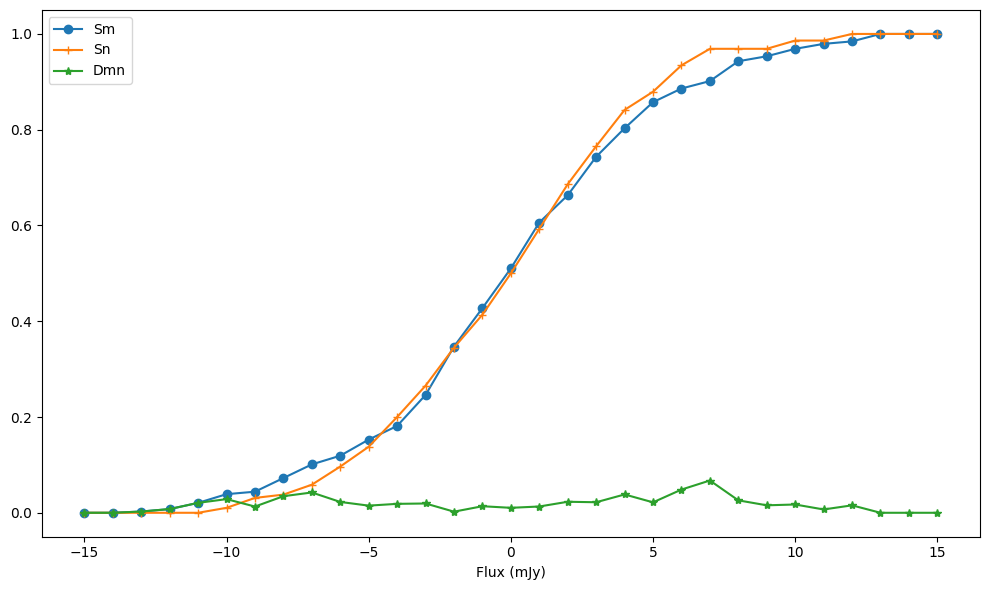

In [148]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(fluxes['mJy'], fluxes['Sm'], label = 'Sm', linestyle = '-', marker ='o')
ax.plot(fluxes['mJy'], fluxes['Sn'],label = 'Sn', linestyle = '-', marker ='+')
ax.plot(fluxes['mJy'], fluxes['Dmn'], label = 'Dmn', linestyle = '-', marker ='*')

ax.legend()
ax.set_xlabel('Flux (mJy)')

plt.tight_layout()
plt.show()

In [149]:
maxDid = fluxes['Dmn'].idxmax()
Dmn = fluxes['Dmn'].loc[maxDid]

print(fluxes.loc[maxDid:maxDid])
print(f'Dmn = {Dmn:.4f}')

    mJy  G   R  Cum_G  Cum_R        Sm        Sn       Dmn
22  7.0  6  10    348    281  0.901554  0.968966  0.067411
Dmn = 0.0674


#### b)
The $H_o$ hypothesis is: 'G' sample does not contain excessive flux compare with the 'R' sample

The alternative hypothesis $H_a$ 'G' sample does contain more flux compared with the 'R' sample

This is a one sided test (we are comparing only for flux(G) > flux(R)). n=386 and m=290 are much larger than 35, so we can use the $\chi^2$ approximation $4D^2_{m,n} \frac{mn}{m + n} $

In [141]:
m = 290
n = 386
factor = (m * n) / (m + n)
print (f'factor: {factor:.1f}')

chisqrd = 4 * Dmn * Dmn * factor
print(f'chi-squared: {chisqrd:.2f}')

factor: 165.6
chi-squared: 3.01


In [110]:
import scipy.stats
import numpy as np

def chi2_values(df, alphas):
    return [scipy.stats.chi2.ppf(1 - alpha, df) for alpha in alphas]

# Signifikanzniveaus
alphas = [0.99, 0.98, 0.95, 0.9, 0.8, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05, 0.025, 0.02, 0.01, 0.001]
# degrees of freedom
n = 2  

chi2_vals = chi2_values(n, alphas)

# Ausgabe der Ergebnisse
for alpha, chi2_val in zip(alphas, chi2_vals):
    print(f"Significance: {alpha:.3f}, Chi-squared: {chi2_val:.4f}")


Significance: 0.990, Chi-squared: 0.0201
Significance: 0.980, Chi-squared: 0.0404
Significance: 0.950, Chi-squared: 0.1026
Significance: 0.900, Chi-squared: 0.2107
Significance: 0.800, Chi-squared: 0.4463
Significance: 0.700, Chi-squared: 0.7133
Significance: 0.500, Chi-squared: 1.3863
Significance: 0.300, Chi-squared: 2.4079
Significance: 0.200, Chi-squared: 3.2189
Significance: 0.100, Chi-squared: 4.6052
Significance: 0.050, Chi-squared: 5.9915
Significance: 0.025, Chi-squared: 7.3778
Significance: 0.020, Chi-squared: 7.8240
Significance: 0.010, Chi-squared: 9.2103
Significance: 0.001, Chi-squared: 13.8155


I notice, that the table in the lecture note contains an error: in the top line, where the significance level is listed, it should be 0.7 instead of 0.8. I checked this also for some other degrees of freedom.

Comparing the calculated test statistic value = 3 from above with $\chi^2$ for 2 degees of freedom, we see that we can only reject $H_0$ at significance levels < 20%

#### c)

For the question, whether Flux(G) != Flux(R), which is the same as saying Flux(G) < Flux(R) OR Flux(G) > Flux(R), this is the definition of a two-tailed test. Taking 5% significance value means $\frac{\alpha}{2} = 0.025$. This gives a $\chi^2 = 7.38$.

Taking above formula 
$4D^2_{m,n} \frac{mn}{m + n} = \chi^2$ we can convert to $ D_{m,n} = \sqrt{\chi^2 \frac{m + n}{4 mn}} $

In [142]:
import numpy as np
import scipy.stats

m = 290
n = 386
alpha = 0.05

chisqrd = scipy.stats.chi2.ppf(1 - alpha / 2, 2)
print(f'chi2: {chisqrd:.4f}')
D_mn = np.sqrt(chisqrd * (m + n) / (4 * m * n))
print (f'D_mn minimum: {D_mn:.5f}')

chi2: 7.3778
D_mn minimum: 0.10554


$D_{m,n}$ should be greater than 0.10554.